In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly as py
import cufflinks as cf
import plotly.graph_objects as go
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline

plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['figure.dpi'] = 70
sns.set_theme(style='white')
sns.set_palette(palette='viridis')

In [64]:
worldcups = pd.read_csv('../content/WorldCups.csv')
players = pd.read_csv('../content/WorldCupPlayers.csv')
matches = pd.read_csv('/content/WorldCupMatches.csv')

In [65]:
worldcups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


**Data Cleaning**

In [66]:
matches.dropna(subset=['Year'], inplace=True)

In [67]:
matches['Home Team Name'].value_counts()

Brazil                       82
Italy                        57
Argentina                    54
Germany FR                   43
England                      35
                             ..
Iran                          1
Angola                        1
rn">Serbia and Montenegro     1
Wales                         1
Haiti                         1
Name: Home Team Name, Length: 78, dtype: int64

In [68]:
#replacing country strings
matches['Home Team Name'] = matches['Home Team Name'].str.replace('rn">', '') #do not exist in worldcups df
matches['Away Team Name'] = matches['Away Team Name'].str.replace('rn">', '')

In [69]:
#replacing country strings for Germany FR
matches['Home Team Name'] = matches['Home Team Name'].str.replace(' FR', '')
matches['Away Team Name'] = matches['Away Team Name'].str.replace(' FR', '')
worldcups['Winner'] = worldcups['Winner'].str.replace(' FR', '')
worldcups['Runners-Up'] = worldcups['Runners-Up'].str.replace(' FR', '')
worldcups['Third'] = worldcups['Third'].str.replace(' FR', '')
worldcups['Fourth'] = worldcups['Fourth'].str.replace(' FR', '')

**Most World Cup Wins**

In [70]:
winner = worldcups['Winner'].value_counts()
winner

Brazil       5
Germany      4
Italy        4
Argentina    2
Uruguay      2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [71]:
second = worldcups['Runners-Up'].value_counts()
second

Germany           4
Argentina         3
Netherlands       3
Hungary           2
Czechoslovakia    2
Brazil            2
Italy             2
France            1
Sweden            1
Name: Runners-Up, dtype: int64

In [72]:
third = worldcups['Third'].value_counts()
third

Germany        4
Poland         2
Brazil         2
France         2
Sweden         2
USA            1
Croatia        1
Chile          1
Italy          1
Portugal       1
Austria        1
Turkey         1
Netherlands    1
Name: Third, dtype: int64

In [73]:
#combine dataframes from 3 previously created
teams = pd.concat([winner, second, third], axis = 1)
teams.fillna(0, inplace=True)
teams.astype(int)
teams.reset_index(inplace=True)
teams

,index,Winner,Runners-Up,Third
0,Brazil,5.0,2.0,2.0
1,Germany,4.0,4.0,4.0
2,Italy,4.0,2.0,1.0
3,Argentina,2.0,3.0,0.0
4,Uruguay,2.0,0.0,0.0
5,England,1.0,0.0,0.0
6,France,1.0,1.0,2.0
7,Spain,1.0,0.0,0.0
8,Netherlands,0.0,3.0,1.0
9,Hungary,0.0,2.0,0.0


In [74]:
#melt into singular dataframe for seaborn visualization
teams_tidy = pd.melt(teams, id_vars='index', var_name='result', value_name='counts')
teams_tidy

,index,result,counts
0,Brazil,Winner,5.0
1,Germany,Winner,4.0
2,Italy,Winner,4.0
3,Argentina,Winner,2.0
4,Uruguay,Winner,2.0
5,England,Winner,1.0
6,France,Winner,1.0
7,Spain,Winner,1.0
8,Netherlands,Winner,0.0
9,Hungary,Winner,0.0


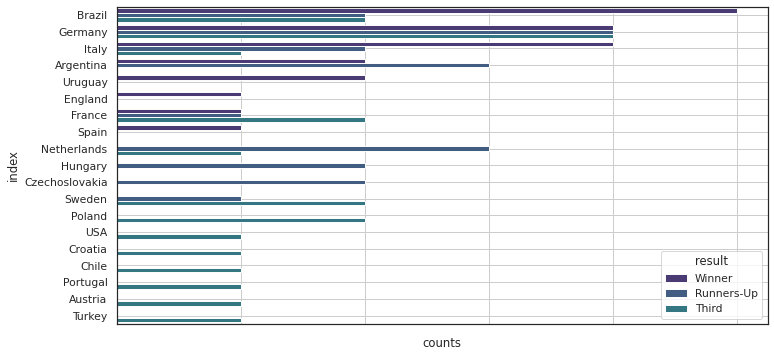

In [97]:
g = sns.barplot(data=teams_tidy, y = 'index', x = 'counts', hue = 'result')
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.grid()

**Goals per Country**

In [76]:
#create 2 dataframes with home/away countries and goals
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [77]:
#renaming columns
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [78]:
#total goals per country as seperate values
goals = home.append(away, ignore_index=True)

In [79]:
#create aggregated df with total goals per (unique) country, sorted decending
goals = goals.groupby('Countries').sum().sort_values(by = 'Goals', ascending=False)

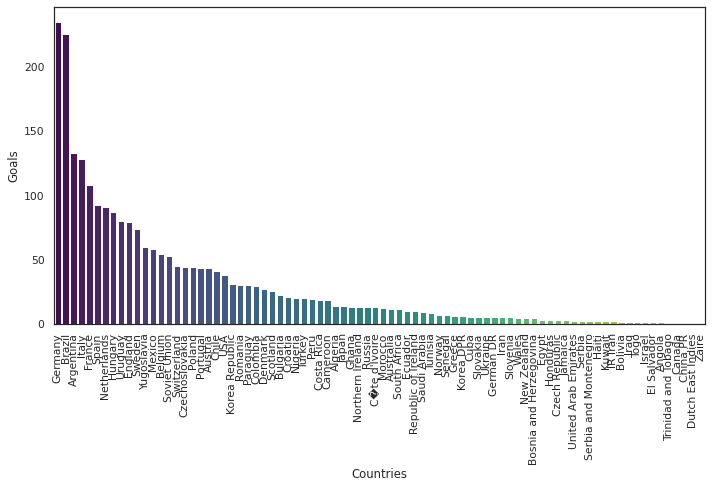

In [80]:
#plotting all countries by number of goals
g = sns.barplot(data=goals, x = goals.index, y = 'Goals', palette='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

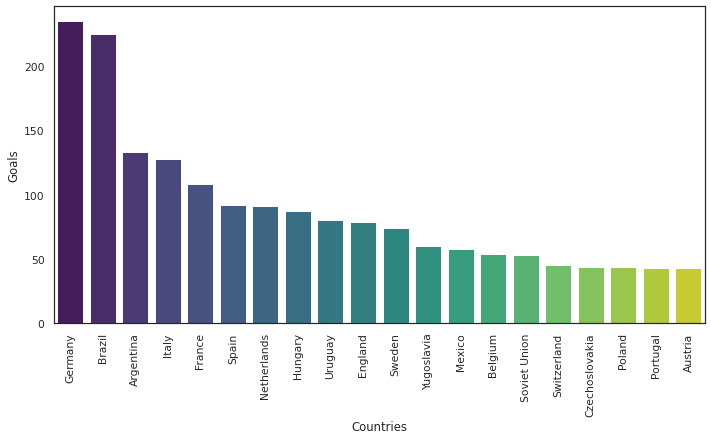

In [81]:
#plotting the top 20 countries with most goals scored
goals_top20 = goals.iloc[:20]
g = sns.barplot(data=goals_top20, x = goals_top20.index, y = 'Goals', palette='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

**Attendance, Number of Teams, Goals, Matches per World Cup**

In [82]:
worldcups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


In [83]:
worldcups['Attendance'] = worldcups['Attendance'].str.replace('.','')

In [84]:
worldcups['Attendance'] = worldcups['Attendance'].astype(int)

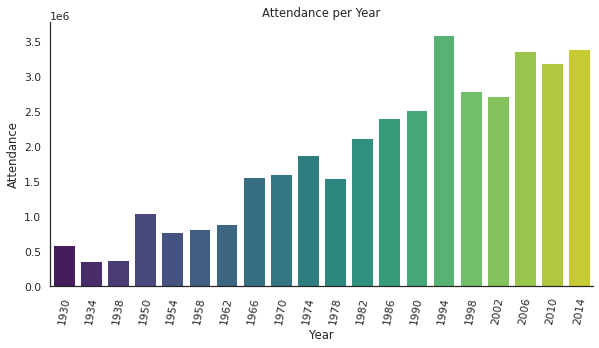

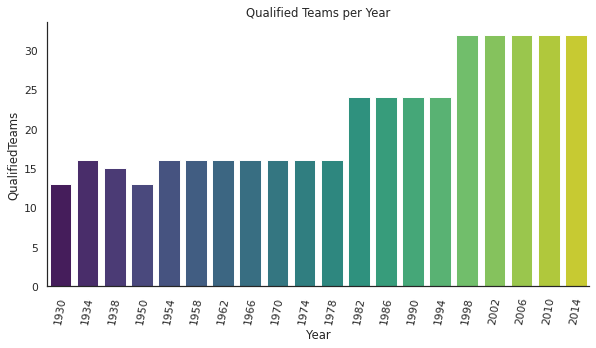

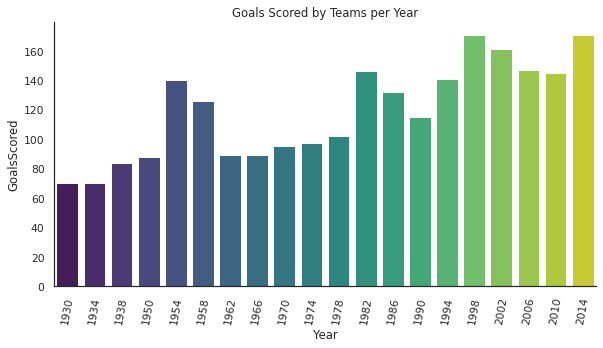

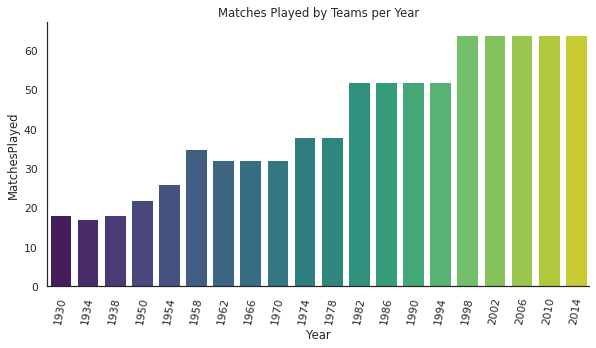

In [85]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = worldcups, palette='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Attendance per Year')

#======================
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = worldcups, palette='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams per Year')

#======================
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = worldcups, palette='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams per Year')

#======================
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = worldcups, palette='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Played by Teams per Year')



plt.show()